# Visual Language Model Evaluation Results
In this notebook we will be analyzing the results from our VLM judge.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/MIDS Capstone/cleaned_evals_1.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)
df.drop(columns=['Unnamed: 0.1'], inplace=True)
df.head(5)

,image_path,eval_json_string,assistant_res,clean_json_string,Evaluation of Category,Evaluation of Type of clothing,Evaluation of Primary Color,Evaluation of Accent Color(s),Evaluation of Pattern,Evaluation of Shape,...,Key design elements,Brand,Style,Occasion suitability,Weather appropriateness,Fabric Material,Fabric Weight,Functional Features,Additional Notes,Evaluation of Accent Color
0,/workspace/clothing-dataset-small/train/pants/...,<|begin_of_text|><|start_header_id|>system<|en...,\n\nTo evaluate the generated product descript...,"```json\n{\n ""Evaluation of Category"": ""Corre...",Correct,Correct,Correct,Correct,Correct,Correct,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,/workspace/clothing-dataset-small/train/pants/...,<|begin_of_text|><|start_header_id|>system<|en...,\n\nThe image shows a pair of blue pants with ...,"{\n ""Evaluation of Category"": ""Correct"",\n ""...",Correct,Correct,Correct,Correct,Correct,Correct,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,/workspace/clothing-dataset-small/train/pants/...,<|begin_of_text|><|start_header_id|>system<|en...,"\n\nBased on the provided image, here is the e...","{\n ""Evaluation of Category"": ""Correct"",\n ""...",Correct,Correct,Correct,Correct,Correct,Correct,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,/workspace/clothing-dataset-small/train/pants/...,<|begin_of_text|><|start_header_id|>system<|en...,"\n\nBased on the image, here is the evaluation...","{\n ""Evaluation of Category"": ""Correct"",\n ""...",Correct,Correct,Correct,Correct,Correct,Correct,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,/workspace/clothing-dataset-small/train/pants/...,<|begin_of_text|><|start_header_id|>system<|en...,"\n\nBased on the provided image, the following...","{\n ""Evaluation of Category"": ""Correct"",\n ""...",Correct,Correct,Correct,Correct,Correct,Correct,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Missing Value Analysis
Here we will investigate the missing values and additional rows. The additional rows are coming from the incorrect naming of the keys in the llm response json string (e.g. should have been "Evaluation of Category" but had just "Category" instead). We will map these back to the correct column and then look into why there are other missing value.

In [ ]:
incorrect_labels = df[df["Key design elements"].notna()]
feature_mapping = {
        "Category": "Evaluation of Category",
        "Type of clothing": "Evaluation of Type of clothing",
        "Primary Color": "Evaluation of Primary Color",
        "Accent Color(s)": "Evaluation of Accent Color(s)",
        "Pattern": "Evaluation of Pattern",
        "Shape": "Evaluation of Shape",
        "Fit": "Evaluation of Fit",
        "Neckline": "Evaluation of Neckline",
        "Key design elements": "Evaluation of Key design elements",
        "Brand": "Evaluation of Brand",
        "Style": "Evaluation of Style",
        "Occasion suitability": "Evaluation of Occasion suitability",
        "Weather appropriateness": "Evaluation of Weather appropriateness",
        "Fabric Material": "Evaluation of Fabric Material",
        "Fabric Weight": "Evaluation of Fabric Weight",
        "Functional Features": "Evaluation of Functional Features",
        "Additional Notes": "Evaluation of Additional Notes"
    }

# map to the correct columns
for i, row in incorrect_labels.iterrows():
    for k, v in feature_mapping.items():
        df.loc[i,v] = df.loc[i,k]
        df.loc[i,k] = None

In [ ]:
# check to make sure worked as expected
total_rows = len(df)
for k, v in feature_mapping.items():
  # check that bad columns are all null now
  if len(df[df[k].notna()]) > 0:
    print(f"{k} has {len(df[df[k].notna()])} non null rows")
  # check that good columns are all good now
  if len(df[df[v].isna()]) > 0:
    print(f"{v} has {len(df[df[v].isna()])} missing rows")

Evaluation of Accent Color(s) has 1 missing rows
Evaluation of Neckline has 5 missing rows
Evaluation of Brand has 10 missing rows
Evaluation of Style has 2 missing rows
Evaluation of Occasion suitability has 4 missing rows
Evaluation of Weather appropriateness has 5 missing rows
Evaluation of Fabric Material has 14 missing rows
Evaluation of Fabric Weight has 32 missing rows
Evaluation of Functional Features has 44 missing rows
Evaluation of Additional Notes has 86 missing rows


Cells used to investigate the source of missing value

In [ ]:
# cell to see that the judge llm response was
df[df["Evaluation of Weather appropriateness"].isna()]['assistant_res'].iloc[0]

'\n\nTo evaluate the generated product description for the provided JSON string, we will follow these steps:\n\n1. **Carefully analyze the image and the provided JSON string**: Since the image is not provided, we will rely on the JSON string to determine the evaluation of each feature.\n\n2. **For each key-value pair, determine if the feature matches the visual details in the image**: We will compare each key-value pair in the JSON string with the visual details in the image.\n\n3. **Return your evaluation as a JSON string, where each key is "Evaluation of {feature name}" and the value is either "Correct" or "Incorrect"**: We will return a JSON string with the evaluation of each feature.\n\n**Evaluation of Features**\n\n*   **Category**: The category is "Outerwear", which matches the visual details in the image. Therefore, the evaluation is "Correct".\n*   **Type of clothing**: The type of clothing is "Puffer Coat", which matches the visual details in the image. Therefore, the evaluati

In [ ]:
# cell to see what the cleaning llm response was
df[df["Evaluation of Weather appropriateness"].isna()]['clean_json_string'].iloc[0]

'```json\n{\n  "Evaluation of Category": "Correct",\n  "Evaluation of Type of clothing": "Correct",\n  "Evaluation of Primary Color": "Correct",\n  "Evaluation of Accent Color(s)": "Correct",\n  "Evaluation of Pattern": "Correct",\n  "Evaluation of Shape": "Correct",\n  "Evaluation of Fit": "Correct",\n  "Evaluation of Neckline": "Correct",\n  "Evaluation of Key design elements": "Correct",\n  "Evaluation of Brand": "Incorrect",\n  "Evaluation of Style": "Correct",\n  "Evaluation of Occasion suitability": "Correct",\n  "Evaluation of Weather appropriateness": "N/A",\n  "Evaluation of Fabric Material": "N/A",\n  "Evaluation of Fabric Weight": "N/A",\n  "Evaluation of Functional Features": "N/A",\n  "Evaluation of Additional Notes": "N/A"\n}\n```'

### Missing Values Conclusion:
* Most of the missing values are coming from the response from the llm being too long, and getting cut off due to the max token length. That is why the features toward the end of the response have a higher null count. In hindsight I should have increased the max token length, it will a while to rerun however so we will work with what we have for now since the percentage of missing values aren't that high.
* Some of the missing values come from "cannot be evaluated" responses. This was seen primarily seen in the brand feature where the brand logo is not visible.

## Clean and Combine datasets
Next we will drop the invalid evaluation columns and then combine the evaluation result dataset with the original predictions dataset. Each row would then contain the image path, predicted features, and the evaluation of the predicted features. This will allow us to do more granular analysis, such as seeing if our recoginition model struggles more on particular types of clothing or fabric types etc.

In [ ]:
# drop the invalid columns (all null at this point)
df.drop(columns=['Category', 'Type of clothing', 'Primary Color', 'Accent Color(s)',
       'Pattern', 'Shape', 'Fit', 'Neckline', 'Key design elements', 'Brand',
       'Style', 'Occasion suitability', 'Weather appropriateness',
       'Fabric Material', 'Fabric Weight', 'Functional Features',
       'Additional Notes', 'Evaluation of Accent Color'], inplace=True)

In [ ]:
# make the image paths match ("/content" used in colab, "/workspace" when I use a serverless gpu instance); will use this as the key to join on
df['image_path'] = df['image_path'].str.replace('workspace', 'content')
df.head(3)

,image_path,eval_json_string,assistant_res,clean_json_string,Evaluation of Category,Evaluation of Type of clothing,Evaluation of Primary Color,Evaluation of Accent Color(s),Evaluation of Pattern,Evaluation of Shape,...,Evaluation of Neckline,Evaluation of Key design elements,Evaluation of Brand,Evaluation of Style,Evaluation of Occasion suitability,Evaluation of Weather appropriateness,Evaluation of Fabric Material,Evaluation of Fabric Weight,Evaluation of Functional Features,Evaluation of Additional Notes
0,/content/clothing-dataset-small/train/pants/9f...,<|begin_of_text|><|start_header_id|>system<|en...,\n\nTo evaluate the generated product descript...,"```json\n{\n ""Evaluation of Category"": ""Corre...",Correct,Correct,Correct,Correct,Correct,Correct,...,Incorrect,Correct,Incorrect,Correct,Correct,Correct,Correct,Correct,Incorrect,Correct
1,/content/clothing-dataset-small/train/pants/65...,<|begin_of_text|><|start_header_id|>system<|en...,\n\nThe image shows a pair of blue pants with ...,"{\n ""Evaluation of Category"": ""Correct"",\n ""...",Correct,Correct,Correct,Correct,Correct,Correct,...,Correct,Correct,Incorrect,Correct,Correct,Correct,Correct,Correct,Correct,Correct
2,/content/clothing-dataset-small/train/pants/f6...,<|begin_of_text|><|start_header_id|>system<|en...,"\n\nBased on the provided image, here is the e...","{\n ""Evaluation of Category"": ""Correct"",\n ""...",Correct,Correct,Correct,Correct,Correct,Correct,...,Correct,Correct,Incorrect,Correct,Correct,Correct,Correct,Correct,Correct,Correct


In [ ]:
# load in dataframe containing predictions
predictions_df = pd.read_csv('/content/drive/MyDrive/MIDS Capstone/eval_set_predictions_1.csv')
predictions_df.drop(columns=['Unnamed: 0'], inplace=True)
predictions_df

,image_path,json_string,Category,Type of clothing,Primary Color,Accent Color(s),Pattern,Shape,Fit,Neckline,Key design elements,Brand,Style,Occasion suitability,Weather appropriateness,Fabric Material,Fabric Weight,Functional Features,Additional Notes
0,/content/clothing-dataset-small/train/pants/9f...,"```json\n{\n ""Category"": ""Bottom"",\n ""Type o...",Bottom,Jeans,Dark Blue,NaN,Solid,Straight-Leg,Relaxed,Not applicable,"Belt loops, button fly, pockets",Not specified,Classic/Traditional,Casual,All-season,Denim,Medium,NaN,These jeans feature a relaxed fit with straigh...
1,/content/clothing-dataset-small/train/pants/65...,"```json\n{\n ""Category"": ""Bottom"",\n ""Type o...",Bottom,Pants,Blue,Black,Solid,Straight-leg,Relaxed,Not applicable,"Belt loops, pockets",Not specified,Casual,Casual,All-season,Cotton,Medium,Not applicable,The blue pants feature a relaxed fit with stra...
2,/content/clothing-dataset-small/train/pants/f6...,"```json\n{\n ""Category"": ""Bottom"",\n ""Type o...",Bottom,Jeans,Blue,White,Ripped,Straight,Slim-Fit,Not applicable,"Ripped details, button fly, pockets",Not specified,Casual,Casual,All-season,Denim,Medium,Not applicable,These jeans feature a slim fit with distinctiv...
3,/content/clothing-dataset-small/train/pants/17...,"```json\n{\n ""Category"": ""Bottom"",\n ""Type o...",Bottom,Pants,Dark Blue,Not applicable,Solid,Straight,Slim-fit,Not applicable,"Side pockets, subtle stitching details",Not specified,Minimalist,Casual,All-season,Cotton,Medium,Not applicable,These dark blue slim-fit pants feature subtle ...
4,/content/clothing-dataset-small/train/pants/4e...,"```json\n{\n ""Category"": ""Bottom"",\n ""Type o...",Bottom,Pants,Black,NaN,Solid,Straight leg,Relaxed,Not applicable,"Elastic waistband, side pockets",Not specified,Athleisure,Casual,All-season,Cotton,Medium,"Elastic waistband for comfort, side pockets fo...",These pants are designed for comfort and funct...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2940,/content/clothing-dataset-small/train/shoes/45...,"```json\n{\n ""Category"": ""Footwear"",\n ""Type...",Footwear,Shoes,Black,Gold,Studded grid,Classic Mary Jane style,Standard,Not applicable,"Studded grid pattern, adjustable strap with me...",Not specified,Classic/traditional,Casual,All-season,Leather,Medium,Not applicable,These shoes feature a timeless design with a s...
2941,/content/clothing-dataset-small/train/shoes/0a...,"```json\n{\n ""Category"": ""Footwear"",\n ""Type...",Footwear,Sandals,Black,"White, Blue",Solid,Open-toe,Standard,Not applicable,"Straps, decorative beads, ankle strap",Calvin Klein,Classic/traditional,Casual,Warm,Suede,Medium,Comfortable for everyday wear,These sandals feature a classic design with a ...
2942,/content/clothing-dataset-small/train/shoes/f8...,"```json\n{\n ""Category"": ""Footwear"",\n ""Type...",Footwear,Sandals,Black,NaN,Woven,Open-toe,Standard,Not applicable,"Straps, woven pattern, open toe",Not specified,Minimalist,Casual,Warm,Leather,Medium,Comfortable for everyday wear,"These sandals feature a sleek, minimalist desi..."
2943,/content/clothing-dataset-small/train/shoes/7d...,"```json\n{\n ""Category"": ""Footwear"",\n ""Type...",Footwear,Slippers,Pink,"Blue, White, Pink",Striped,Open-toe,Relaxed,Not applicable,Strips of different colors across the top part...,Not specified,Casual,Casual,Warm,Plastic or synthetic,Lightweight,Comfortable for indoor use,These slippers are designed for comfort and st...


In [ ]:
# perform left join on image path
full_df = df.join(predictions_df.set_index('image_path'), on='image_path')
full_df

,image_path,eval_json_string,assistant_res,clean_json_string,Evaluation of Category,Evaluation of Type of clothing,Evaluation of Primary Color,Evaluation of Accent Color(s),Evaluation of Pattern,Evaluation of Shape,...,Neckline,Key design elements,Brand,Style,Occasion suitability,Weather appropriateness,Fabric Material,Fabric Weight,Functional Features,Additional Notes
0,/content/clothing-dataset-small/train/pants/9f...,<|begin_of_text|><|start_header_id|>system<|en...,\n\nTo evaluate the generated product descript...,"```json\n{\n ""Evaluation of Category"": ""Corre...",Correct,Correct,Correct,Correct,Correct,Correct,...,Not applicable,"Belt loops, button fly, pockets",Not specified,Classic/Traditional,Casual,All-season,Denim,Medium,NaN,These jeans feature a relaxed fit with straigh...
1,/content/clothing-dataset-small/train/pants/65...,<|begin_of_text|><|start_header_id|>system<|en...,\n\nThe image shows a pair of blue pants with ...,"{\n ""Evaluation of Category"": ""Correct"",\n ""...",Correct,Correct,Correct,Correct,Correct,Correct,...,Not applicable,"Belt loops, pockets",Not specified,Casual,Casual,All-season,Cotton,Medium,Not applicable,The blue pants feature a relaxed fit with stra...
2,/content/clothing-dataset-small/train/pants/f6...,<|begin_of_text|><|start_header_id|>system<|en...,"\n\nBased on the provided image, here is the e...","{\n ""Evaluation of Category"": ""Correct"",\n ""...",Correct,Correct,Correct,Correct,Correct,Correct,...,Not applicable,"Ripped details, button fly, pockets",Not specified,Casual,Casual,All-season,Denim,Medium,Not applicable,These jeans feature a slim fit with distinctiv...
3,/content/clothing-dataset-small/train/pants/17...,<|begin_of_text|><|start_header_id|>system<|en...,"\n\nBased on the image, here is the evaluation...","{\n ""Evaluation of Category"": ""Correct"",\n ""...",Correct,Correct,Correct,Correct,Correct,Correct,...,Not applicable,"Side pockets, subtle stitching details",Not specified,Minimalist,Casual,All-season,Cotton,Medium,Not applicable,These dark blue slim-fit pants feature subtle ...
4,/content/clothing-dataset-small/train/pants/4e...,<|begin_of_text|><|start_header_id|>system<|en...,"\n\nBased on the provided image, the following...","{\n ""Evaluation of Category"": ""Correct"",\n ""...",Correct,Correct,Correct,Correct,Correct,Correct,...,Not applicable,"Elastic waistband, side pockets",Not specified,Athleisure,Casual,All-season,Cotton,Medium,"Elastic waistband for comfort, side pockets fo...",These pants are designed for comfort and funct...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2940,/content/clothing-dataset-small/train/shoes/45...,<|begin_of_text|><|start_header_id|>system<|en...,"\n\nBased on the image, here is the evaluation...","{\n ""Evaluation of Category"": ""Correct"",\n ""...",Correct,Correct,Correct,Correct,Correct,Correct,...,Not applicable,"Studded grid pattern, adjustable strap with me...",Not specified,Classic/traditional,Casual,All-season,Leather,Medium,Not applicable,These shoes feature a timeless design with a s...
2941,/content/clothing-dataset-small/train/shoes/0a...,<|begin_of_text|><|start_header_id|>system<|en...,\n\n### Image Description\n\nThe image feature...,"{\n ""Evaluation of Category"": ""Correct"",\n ""...",Correct,Correct,Correct,Correct,Correct,Correct,...,Not applicable,"Straps, decorative beads, ankle strap",Calvin Klein,Classic/traditional,Casual,Warm,Suede,Medium,Comfortable for everyday wear,These sandals feature a classic design with a ...
2942,/content/clothing-dataset-small/train/shoes/f8...,<|begin_of_text|><|start_header_id|>system<|en...,\n\nThe image shows a pair of black sandals wi...,"{\n ""Evaluation of Category"": ""Correct"",\n ""...",Correct,Correct,Correct,Correct,Correct,Correct,...,Not applicable,"Straps, woven pattern, open toe",Not specified,Minimalist,Casual,Warm,Leather,Medium,Comfortable for everyday wear,"These sandals feature a sleek, minimalist desi...

In [ ]:
# quick sanity check that the join was successful
full_df["Category"].isna().sum()

0

Size of the dataframe is correct and prediction column values were added successfully, so join was successful.

## Main Analysis
Now lets look into the accuracy and other metrics for our different features. We will ignore the na values in our analysis. They are neither an indictor for correctness or incorrectness, but rather exist due to the max token length mistake in evaluating.

In [ ]:
# Initialize a dictionary to store the accuracy of each column
accuracy_dict = {}

# List of relevant column names
columns_to_evaluate = [
    "Evaluation of Category", "Evaluation of Type of clothing", "Evaluation of Primary Color",
    "Evaluation of Accent Color(s)", "Evaluation of Pattern", "Evaluation of Shape",
    "Evaluation of Fit", "Evaluation of Neckline", "Evaluation of Key design elements",
    "Evaluation of Brand", "Evaluation of Style", "Evaluation of Occasion suitability",
    "Evaluation of Weather appropriateness", "Evaluation of Fabric Material",
    "Evaluation of Fabric Weight", "Evaluation of Functional Features", "Evaluation of Additional Notes"
]

# Iterate over each column and calculate accuracy (ignoring na)
for column in columns_to_evaluate:
    accuracy = sum(full_df[column] == "Correct") / sum(full_df[column].notna())
    accuracy_dict[column[13:]] = accuracy

# Convert the dictionary to a DataFrame for better visualization
accuracy_df = pd.DataFrame(list(accuracy_dict.items()), columns=["Column", "Accuracy"])

# display the accuracy DataFrame
accuracy_df.sort_values(by='Accuracy', ascending=True)

,Column,Accuracy
9,Brand,0.322658
15,Functional Features,0.820407
16,Additional Notes,0.900315
14,Fabric Weight,0.939924
0,Category,0.943973
1,Type of clothing,0.949066
13,Fabric Material,0.955305
3,Accent Color(s),0.955503
7,Neckline,0.961905
12,Weather appropriateness,0.978571


Most of the features perform well (>95%). However brand is notablely bad at 32% accuracy. Functional features is also lower than other features at 82%. I'm not too worried about the next two lowest features ("Additional Notes" and "Fabric Weight") since those are fairly subjective. I was surprised to see Category at 94% though as I thought that would be a straightforward classification.

For the remainder of the notebook, I will be investigating more into:
1. Brand
2. Functional Features
3. Category

### Brand Investigation
Lets look at the rows that the Brand feature was labeled as incorrect and see if we can find any patterns.

In [ ]:
# cell for investigating the judge response
print(full_df[full_df["Evaluation of Brand"] == "Incorrect"]["assistant_res"][0])



To evaluate the generated product description against the actual image of the item, we need to compare each key-value pair in the description with the visual details in the image.

**Image Description:**
The image shows a pair of dark blue jeans with a relaxed fit and straight legs. The jeans have belt loops, a button fly, and pockets. The fabric appears to be denim, and the weight is medium. There are no functional features or additional notes visible in the image.

**Evaluation:**
Based on the image, we can evaluate each key-value pair in the description as follows:

*   **Category:** Correct (the image shows a pair of pants, which is a type of bottom)
*   **Type of clothing:** Correct (the image shows jeans, which is a type of pants)
*   **Primary Color:** Correct (the image shows dark blue jeans)
*   **Accent Color(s):** Correct (there are no accent colors visible in the image)
*   **Pattern:** Correct (the image shows a solid color, no pattern is visible)
*   **Shape:** Correct 

In [ ]:
# cell for investigating the predicted features
print(full_df[full_df["Evaluation of Brand"] == "Incorrect"]["json_string"][0])

```json
{
  "Category": "Bottom",
  "Type of clothing": "Jeans",
  "Primary Color": "Dark Blue",
  "Accent Color(s)": "None",
  "Pattern": "Solid",
  "Shape": "Straight-Leg",
  "Fit": "Relaxed",
  "Neckline": "Not applicable",
  "Key design elements": "Belt loops, button fly, pockets",
  "Brand": "Not specified",
  "Style": "Classic/Traditional",
  "Occasion suitability": "Casual",
  "Weather appropriateness": "All-season",
  "Fabric Material": "Denim",
  "Fabric Weight": "Medium",
  "Functional Features": "None",
  "Additional Notes": "These jeans feature a relaxed fit with straight legs, ideal for everyday wear. The dark blue color and classic design make them versatile for various casual outfits."
}
```


One thing that I noticed was that when the Brand was labeled as Not Specified, the judge would mark the label as wrong. Lets do some more analysis to confirm if this is what is happening.

In [ ]:
incorrect_brand_counts = full_df[full_df["Evaluation of Brand"] == "Incorrect"]["Brand"].value_counts()
print("Value counts when Brand is labeled as Incorrect:")
incorrect_brand_counts

Value counts when Brand is labeled as Incorrect:


,count
Brand,
Not specified,1842
Not Specified,22
Unknown,14
H&M,9
Unspecified,9
Levi's,4
Calvin Klein,2
Disney,1
Hallman,1


In [ ]:
not_specified_counts = incorrect_brand_counts["Not specified"] + incorrect_brand_counts["Not Specified"]
total_incorrect_brand = sum(incorrect_brand_counts)
print(f"Percentage of Incorrect Brand Values that had label of \"Not specified\": {(not_specified_counts / total_incorrect_brand) * 100 : .2f}%")

Percentage of Incorrect Brand Values that had label of "Not specified":  96.18%


In [ ]:
total_not_specified_count = full_df["Brand"].value_counts()["Not specified"] + full_df["Brand"].value_counts()["Not Specified"]
print(f"Percentage of \"Not specified\" labels marked as incorrect: {(not_specified_counts/ total_not_specified_count) * 100 : .2f}%")

Percentage of "Not specified" labels marked as incorrect:  80.80%


In [ ]:
ns_removed_df = full_df[full_df["Brand"] != "Not specified"]
ns_removed_df = ns_removed_df[ns_removed_df["Brand"] != "Not Specified"]
accuracy = sum(ns_removed_df["Evaluation of Brand"] == "Correct") / sum(ns_removed_df["Evaluation of Brand"].notna())
print(f"Accuracy of Brand Feature when not specified samples removed: {accuracy * 100 : .2f}%")

Accuracy of Brand Feature when not specified samples removed:  85.11%


### Brand Conclusion
When the brand was labeled incorrect, a majority (96.18%) of the time the brand was marked as "Not specified". The LLM is inconsistent in how it deals with this case, sometimes (80.80%) penalizing the lack of labeling the brand and sometimes (19.20%) rewarding for making the judgement that the brand is uncertain. Many of the sample clothing images don't have any indication of the brand and the brand is unable to be clearly determined even by a human labeler. Although I cannot not say for certain without spending more time investigating, I am fairly confident that the low accuracy is due to the judging process rather than a failure in the recognition model. If we remove the "Not Specified" labeled samples when computing the accuracy, the brand accuracy would be 85.11% which is a lot better than ~30%.



### Functional Features Investigation
Now lets do the same of Functional Features and look at the rows that were labeled as incorrect and see if we can find any patterns.

In [ ]:
# cell for investigating the judge response
print(full_df[full_df["Evaluation of Functional Features"] == "Incorrect"]["assistant_res"].iloc[4])



Based on the provided image of the pants and the description, here is the evaluation of each feature:

*   **Category**: Correct, as the pants are indeed bottoms.
*   **Type of clothing**: Correct, as the pants are a type of clothing.
*   **Primary Color**: Correct, as the primary color of the pants is white.
*   **Accent Color(s)**: Correct, as the accent color of the pants is black.
*   **Pattern**: Correct, as the pants feature an Aztec-inspired pattern.
*   **Shape**: Correct, as the pants have a straight leg shape.
*   **Fit**: Correct, as the pants have a relaxed fit.
*   **Neckline**: Correct, as the pants do not have a neckline.
*   **Key design elements**: Correct, as the pants feature an Aztec pattern and a straight leg shape.
*   **Brand**: Incorrect, as the brand of the pants is not specified in the image.
*   **Style**: Correct, as the pants are casual.
*   **Occasion suitability**: Correct, as the pants are suitable for casual occasions.
*   **Weather appropriateness**:

In [ ]:
# cell for investigating the predicted features
print(full_df[full_df["Evaluation of Functional Features"] == "Incorrect"]["json_string"].iloc[4])

```json
{
  "Category": "Bottom",
  "Type of clothing": "Pants",
  "Primary Color": "White",
  "Accent Color(s)": "Black",
  "Pattern": "Aztec",
  "Shape": "Straight leg",
  "Fit": "Relaxed",
  "Neckline": "Not applicable",
  "Key design elements": "Aztec pattern, straight leg",
  "Brand": "Not specified",
  "Style": "Casual",
  "Occasion suitability": "Casual",
  "Weather appropriateness": "All-season",
  "Fabric Material": "Cotton",
  "Fabric Weight": "Lightweight",
  "Functional Features": "Not applicable",
  "Additional Notes": "The pants feature an Aztec-inspired pattern in black and white, offering a stylish yet comfortable option for casual outings. The relaxed fit ensures ease of movement and comfort."
}
```


Similar to Brand, it seems like when Functional Features is labeled with "Not Applicable", the LLM judge marks it as incorrect often times.

In [ ]:
incorrect_functional_counts = full_df[full_df["Evaluation of Functional Features"] == "Incorrect"]["Functional Features"].value_counts()
print("Value counts when Functional Features is labeled as Incorrect:")
incorrect_functional_counts

Value counts when Functional Features is labeled as Incorrect:


,count
Functional Features,
Not applicable,223
Not specified,75
Not applicable for this type of garment,6
Moisture-wicking,5
Insulated,3
Water-resistant,2
Not Applicable,2
Unknown (not specified),1
No specific functional features mentioned,1


### Functional Features Conclusion
It seems that similar to what we saw with Brand, when Functional Features is labeled with "Not Applicable", "Not specified", or other variations of this sentiment, the LLM judge often marks it as incorrect. When looking at the table above, basically all of the rows marked as incorrect was some variation of "Not Applicable". Again, this is not an issue with our recognition model but rather something we should fix in our further iterations of evaluation.

### Category Investigation
Now lets do the same of Category and look at the rows that were labeled as incorrect. The accuracy is pretty high already, but I am mostly curious to see if there were certain categories that the model was particularly struggling with.

In [ ]:
# cell for investigating the judge response
print(full_df[full_df["Evaluation of Category"] == "Incorrect"]["eval_json_string"].iloc[2])

<|begin_of_text|><|start_header_id|>system<|end_header_id|>

Cutting Knowledge Date: December 2023
Today Date: 02 Mar 2025

[{'type': 'text', 'text': '\n"You are a meticulous and objective visual-language model (VLM) judge.\nYour task is to evaluate a generated product description for a clothing item against the actual image of the item.\nThe description is provided as a JSON string, where each key-value pair represents a specific feature of the clothing item.\nFor each key-value pair in the description, compare it to the visual details in the image and determine if the feature is Correct or Incorrect.\nReturn your evaluation as a JSON string, where each key is "Evaluation of {feature name}" and the value is either "Correct" or "Incorrect".\n\nInstructions:\n1. Carefully analyze the image and the provided JSON description.\n2. For each key-value pair, determine if the feature described matches the visual details in the image.\n3. If the feature matches, label it as "Correct". If it doe

In [ ]:
# cell for investigating the judge response
print(full_df[full_df["Evaluation of Category"] == "Incorrect"]["json_string"].iloc[2])

```json
{
  "Category": "Bottom",
  "Type of clothing": "Track Pants",
  "Primary Color": "Blue",
  "Accent Color(s)": "White",
  "Pattern": "Solid",
  "Shape": "Straight leg",
  "Fit": "Relaxed",
  "Neckline": "Not applicable",
  "Key design elements": "Adidas logo on the left thigh, elastic waistband, drawstrings",
  "Brand": "Adidas",
  "Style": "Athleisure",
  "Occasion suitability": "Casual",
  "Weather appropriateness": "All-season",
  "Fabric Material": "Cotton",
  "Fabric Weight": "Medium",
  "Functional Features": "Not specified",
  "Additional Notes": "These track pants from Adidas offer a comfortable and casual look suitable for everyday wear. The relaxed fit and solid blue color make them versatile for various activities, from running errands to lounging at home."
}
```


In [ ]:
# display sample image
from IPython.display import Image
# clone the repository of images
!git clone https://github.com/alexeygrigorev/clothing-dataset-small.git

Cloning into 'clothing-dataset-small'...
remote: Enumerating objects: 3839, done.
remote: Counting objects: 100% (400/400), done.
remote: Compressing objects: 100% (400/400), done.
remote: Total 3839 (delta 9), reused 385 (delta 0), pack-reused 3439 (from 1)
Receiving objects: 100% (3839/3839), 100.58 MiB | 35.36 MiB/s, done.
Resolving deltas: 100% (10/10), done.
Updating files: 100% (3783/3783), done.


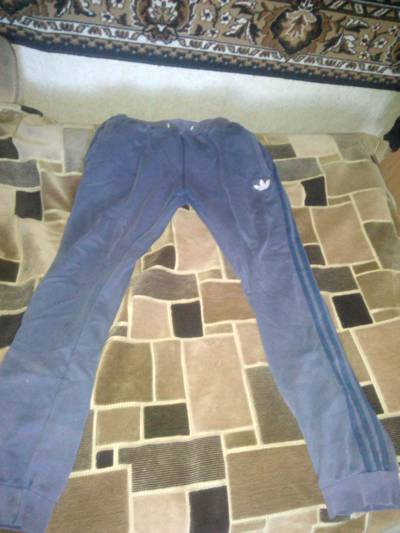

In [ ]:
Image(full_df[full_df["Evaluation of Category"] == "Incorrect"]["image_path"].iloc[2])

Seems like the judge model hallucinates sometimes. Such as in the example above, the predicted category was Bottom and the predicted response correctly identified the image as a pair of track pants. But for some reason in the judging, the judge llm mentioned that the prediction classified the image as a dress, which did not happen.

I also realized that we do have a ground truth category for this image dataset based on the folder the image was stored in. The image path contains this label, so lets try using this instead.

In [ ]:
def determine_category_truth(image_path):
  if "pants" in image_path or "skirt" in image_path or "shorts" in image_path:
    return "Bottom"
  elif "t-shirt" in image_path or "longsleeve" in image_path or "shirt" in image_path or "dress" in image_path:
    return "Top"
  elif "shoe" in image_path:
    return "Footwear"
  elif "outwear" in image_path:
    return "Outerwear"

In [ ]:
full_df["Category_Truth"] = full_df["image_path"].apply(determine_category_truth)
full_df["Category_Truth"]

,Category_Truth
0,Bottom
1,Bottom
2,Bottom
3,Bottom
4,Bottom
...,...
2940,Footwear
2941,Footwear
2942,Footwear
2943,Footwear


In [ ]:
# compute Category based on the ground truth instead of judge llm
sum(full_df["Category_Truth"] == full_df["Category"]) / len(full_df)

0.965704584040747

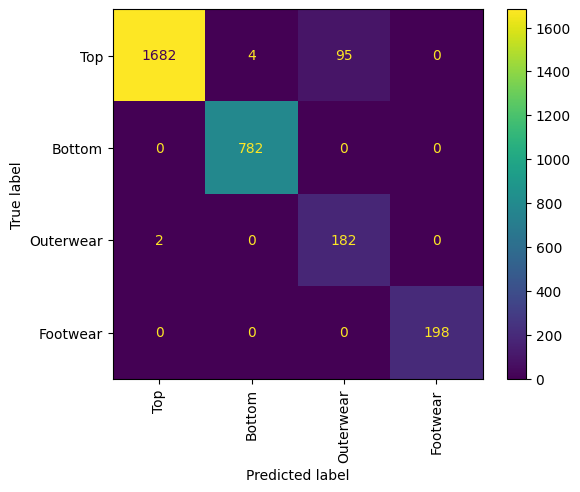

In [ ]:
# visualize confusion matrix for predicted Category vs Category ground truth
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

true_labels = full_df["Category_Truth"]
preds = full_df["Category"]
labels = ["Top", "Bottom", "Outerwear", "Footwear"]
cm = confusion_matrix(true_labels, preds, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
plt.xticks(rotation=90)
plt.show()

Seems like most of the errors in predicting Category comes from the model mistakenly predicting "Outerwear" when the true label is "Top". Makes sense since the two categories can be ambigious between one another. Not a big deal in my opinion for our use case.

Out of curiousity, lets see what the accuracy for each category is, when compared with the ground truth and when compared with the llm judge. To keep it consistent, the most accurate term would be the false positive rate. For category X, we will compute num times correct divided by num times predicted, since we don't have label for the llm judge, just correct or incorrect.

In [ ]:
# FPR for each category when compared to the ground truth
for label in labels:
  df  = full_df[full_df["Category"] == label]
  print(f"{label} FPR: {sum(df['Category_Truth'] == df['Category']) / len(df) * 100 : .2f}%")

Top FPR:  99.88%
Bottom FPR:  99.49%
Outerwear FPR:  65.70%
Footwear FPR:  100.00%


In [ ]:
# FPR for each category when compared to the llm judgement
for label in labels:
  df  = full_df[full_df["Category"] == label]
  num_correct = sum(df['Evaluation of Category'] == "Correct")
  print(f"{label} FPR: {num_correct / len(df) * 100 : .2f}%")

Top FPR:  90.86%
Bottom FPR:  99.24%
Outerwear FPR:  98.19%
Footwear FPR:  100.00%


### Category Conclusion
1. Recognition model makes most mistakes in classifying between the "Top" and "Outerwear" categories. Makes sense since these can be ambiguous at times. Should be a non issue.
2. Found a couple cases of the LLM judge hallucinating but doesn't happen too often as since we saw that the judgements ended up being pretty similar the ground truth category labels overall.